# <span style="color:yellow">New Classes and Some Functions</span>

In [1]:
%matplotlib widget 
from TMclass import *
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xml.etree import ElementTree
from xml.etree.ElementTree import ParseError
from datetime import datetime as DT
from datetime import timedelta as TD


def tmDict(fileName):

    class XML:
        DURATION = 'duration'
        TMRATE = 'tm_rate'
        STATION = 'station'
        TIME = 'time'
        PASS_END = '/>'
        PASS_START = '<PASS'

    def decode_line(line_string):
        if XML.TIME not in line_string or XML.DURATION not in line_string or XML.TMRATE not in line_string:
            return None, None, None
        # print(f'Decoding line {line_string}')
        xml_node = ElementTree.fromstring(line_string)
        start_pass = xml_node.get(XML.TIME)
        duration = int(xml_node.get(XML.DURATION))
        tm_rate = float(xml_node.get(XML.TMRATE))
        start_pass = DT.strptime(start_pass,"%Y-%jT%H:%M:%SZ")
        
        return start_pass, duration, tm_rate

    with open(fileName) as f:
        lines = f.readlines()
    lines = [line.strip() for line in lines]
    TM = {'date':[], 'tm_rate':[], 'duration':[]}
    result = []
    for i, line in enumerate(lines):
        if len(result) > 0 and len(result[-1][0]):
            if (XML.PASS_START in result[-1][0] and XML.PASS_END not in result[-1][0]):
                result[-1] = (result[-1][0] + ' '+ line, result[-1][1])
                continue
            line_string, line_number = result[-1]
            if (XML.PASS_START in result[-1][0] and XML.PASS_END in result[-1][0]):
                try:
                    start_pass, duration, tm_rate = decode_line(line_string)
                except ParseError as e:
                    print(line_string)
                    raise ParseError(e)
                if start_pass is not None:
                    TM['date'] += [start_pass]
                    TM['tm_rate'] += [duration]
                    TM['duration'] += [tm_rate]
        result.append((line, i))

    TM['date'] = np.asarray(TM['date'])
    TM['tm_rate'] = np.asarray(TM['tm_rate'])
    TM['duration'] = np.asarray(TM['duration'])

    return TM

def phiITL(itlFile):
    f = open(itlFile,'r')
    lines = f.readlines()

    FL = {'date':[], 'flush':[]}

    for x in lines:
        temp = x.split(' ')
        # print(temp)
        if 'PH_FLUSH' in temp[9]:
            FL['date'] += [DT.fromisoformat(temp[0][:-1])]
            FL['flush'] += [float(temp[-1][19:-2])]

    FL['date'] = np.asarray(FL['date'])
    FL['flush'] = np.asarray(FL['flush'])

    return FL

# you have to remove what is inside <eventfile> --> old version

TM3 = tmDict('../SIFECS_NMP_Segment_2_withLTP10-11FECS.xml')
TM3n = tmDict('../FECS_2023072_2023177_2022348130413_v03.SOL')
TM13 = tmDict('../SIFECS_SIFECS_LTP12-13_preFECS_Mission_Level_Plan_for_LTP12_and_13_2.xml')
# TM14 = tmDict('../SIFECS_SIFECS_sifecs_Segment_3_LTP14FECS_LTP15PreFECS_Mission_Level_Plan_for_NMP_Segment_3_v2_Mission_Level_Plan_for_NMP_Segment_3.xml')
TM14 = tmDict('../EFECS_M14_V01.xml')
TM15 = tmDict('../EFECS_M15_V00.xml')

idx0 = np.where(TM3['date'] > TM3n['date'][0])[0][0]
idx1 = np.where(TM3['date'] < TM3n['date'][-1])[0][-1]
TM3['date'] = np.concatenate((TM3['date'][:idx0],TM3n['date'],TM3['date'][idx1:]))
TM3['tm_rate'] = np.concatenate((TM3['tm_rate'][:idx0],TM3n['tm_rate'],TM3['tm_rate'][idx1:]))
TM3['duration'] = np.concatenate((TM3['duration'][:idx0],TM3n['duration'],TM3['duration'][idx1:]))

idx0 = np.where(TM3['date'] > TM13['date'][0])[0][0]
idx1 = np.where(TM3['date'] < TM13['date'][-1])[0][-1]
TM3['date'] = np.concatenate((TM3['date'][:idx0],TM13['date'],TM3['date'][idx1:]))
TM3['tm_rate'] = np.concatenate((TM3['tm_rate'][:idx0],TM13['tm_rate'],TM3['tm_rate'][idx1:]))
TM3['duration'] = np.concatenate((TM3['duration'][:idx0],TM13['duration'],TM3['duration'][idx1:]))

idx0 = np.where(TM3['date'] > TM14['date'][0])[0][0]
idx1 = np.where(TM3['date'] < TM14['date'][-1])[0][-1]
TM3['date'] = np.concatenate((TM3['date'][:idx0],TM14['date'],TM3['date'][idx1:]))
TM3['tm_rate'] = np.concatenate((TM3['tm_rate'][:idx0],TM14['tm_rate'],TM3['tm_rate'][idx1:]))
TM3['duration'] = np.concatenate((TM3['duration'][:idx0],TM14['duration'],TM3['duration'][idx1:]))

idx0 = np.where(TM3['date'] > TM15['date'][0])[0][0]
idx1 = np.where(TM3['date'] < TM15['date'][-1])[0][-1]
TM3['date'] = np.concatenate((TM3['date'][:idx0],TM15['date'],TM3['date'][idx1:]))
TM3['tm_rate'] = np.concatenate((TM3['tm_rate'][:idx0],TM15['tm_rate'],TM3['tm_rate'][idx1:]))
TM3['duration'] = np.concatenate((TM3['duration'][:idx0],TM15['duration'],TM3['duration'][idx1:]))

# f = open('../phi.itl','r')
# lines = f.readlines()

# FL = {'date':[], 'flush':[]}

# for x in lines:
#     temp = x.split(' ')
#     if 'PHI_SCI_Flush_VOL' in temp[-1]:
#         FL['date'] += [DT.fromisoformat(temp[0][:-1])]
#         FL['flush'] += [float(temp[-1][19:-2])]
#         # print(temp[0][:-1],temp[-1][19:-2])

# FL['date'] = np.asarray(FL['date'])
# FL['flush'] = np.asarray(FL['flush'])

FL = phiITL('../phiLTP15-SOWG.itl')


In [27]:
open('../phiLTP15-SOWG.itl').readlines()[5]

'2024-03-17T04:05:17Z   SPHI   *   PH_FLSLL    (PHI_LL_Flush_VOL=-1.0)\n'

In [2]:
def flush_many(PHI,max_vol, vol_dataset, phi_mode, start, nbits, ndata, level, partition):
    # global PHI
    # global phi
    
    def _new_start(start,end):
        start += TD(days=1)
        start = start.replace(hour=22,minute=0,second=0)
        if end > start:
            start = end + TD(hours=1)
        return start
    
    vol0 = max_vol[0]
    vol1 = max_vol[1]
    n0 = int(vol0 // vol_dataset * 0.99)
    n1 = int(vol1 // vol_dataset * 0.99)

    if ndata == -1:
        ndata = phi_mode.level_out(level).n_datasets
    
    print(f'Days needed: {(ndata-n0)//n1+2}')
    kw = phi_mode.compressing(start, nbits = nbits, ndata = n0,level=level); PHI.saving(partition,**kw)
    # start += TD(days=1)
    start = _new_start(start,kw['end'])

    for i in range((ndata-n0)//n1+1):
        kw = phi_mode.compressing(start, nbits = nbits, ndata = min(ndata - n0 - i*n1,n1),level=level); PHI.saving(partition,**kw)
        start = _new_start(start,kw['end'])

    return (phi_mode, kw)
    
def synoptic(PHI,mode,t0,t1,cadence,shape,nout,nbits,i,format = False):
    # t0 = DT.fromisoformat('2023-04-15T00:00:00')
    # t1 = DT.fromisoformat('2023-05-01T00:00:00')

    # cad = 6*60
    # global PHI
    mode = PHI_mode(mode)
    N = int(np.ceil((t1 - t0).total_seconds() / (60*cadence)))

    ti = t0
#     deltat = (t1 - t0)/N
    deltat = TD(minutes=cadence)
    
    min2 = TD(minutes=2)
    form = False
    for n in range(N):
        kw = mode.observation(ti,ti+min2,cadence=2,shape=shape); PHI.saving(i,**kw)
        if shape[1] != 2048:
            kw = mode.cropping(kw['end'] + TD(minutes=5),ndata=-1,crop=[shape[1],shape[1]],level='raw'); PHI.saving(i,**kw)
            kw = mode.processing(kw['end'] + TD(minutes=5),ndata=-1,partialStore=0x00,level='raw.crop',nout=nout); PHI.saving(i,**kw)
            kw = mode.compressing(kw['end'] + TD(minutes=5), nbits = nbits, ndata = -1,level='raw.crop.proc'); PHI.saving(i,**kw)
        else:
            kw = mode.processing(kw['end'] + TD(minutes=5),ndata=-1,partialStore=0x00,level='raw',nout=nout); PHI.saving(i,**kw)
            kw = mode.compressing(kw['end'] + TD(minutes=5), nbits = nbits, ndata = -1,level='raw.proc'); PHI.saving(i,**kw)
        ti = ti + deltat
        if format:
            if PHI.part1.occu > 220e3 or PHI.part2.occu > 220e3:
                PHI.format_partition(i,kw['end'])
                i = i%2 + 1
    return mode

def synoptic_raw(PHI,mode,t0,t1,cadence,shape,nbits,i, crop_pack = True, format = False):
    # t0 = DT.fromisoformat('2023-04-15T00:00:00')
    # t1 = DT.fromisoformat('2023-05-01T00:00:00')

    # cad = 6*60
    # global PHI
    mode = PHI_MODE(mode)
    N = int(np.ceil((t1 - t0).total_seconds() / (60*cadence)))

    ti = t0
#     deltat = (t1 - t0)/N
    deltat = TD(minutes=cadence)
    
    min2 = TD(minutes=2)
    form = False
    for n in range(N):
        kw = mode.observation(ti,ti+min2,cadence=2,shape=shape); PHI.saving(i,**kw)
        if shape[1] != 2048:
            kw = mode.cropping(kw['end'] + TD(minutes=5),ndata=-1,crop=[shape[1],shape[1]],level='raw');
            if crop_pack == False:
                PHI.saving(i,**kw)
            kw = mode.packing(kw['end'] + TD(minutes=5),ndata=-1,level='raw.crop'); PHI.saving(i,**kw)
            kw = mode.compressing(kw['end'] + TD(minutes=5), nbits = nbits, ndata = -1,level='raw.crop.pack'); PHI.saving(i,**kw)
        else:
            kw = mode.packing(kw['end'] + TD(minutes=5),ndata=-1,level='raw'); PHI.saving(i,**kw)
            kw = mode.compressing(kw['end'] + TD(minutes=5), nbits = nbits, ndata = -1,level='raw.pack'); PHI.saving(i,**kw)
        ti = ti + deltat
        if format:
            if PHI.part1.occu > 220e3 or PHI.part2.occu > 220e3:
                PHI.format_partition(i,kw['end'])
                i = i%2 + 1
    return mode

def FDT_flat(PHI,t0,idx,proc='auto',flush='auto',verbose=True):

    # global PHI
    t1 = t0+TD(minutes=55)
    proc_time = TD(hours=5)

    FDTf1 = PHI_MODE('FDT')

    kw = FDTf1.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); PHI.saving(idx,**kw)
    if proc == 'auto':
        t0 = kw['end']+TD(minutes=5)
    else:
        t0 = proc
    kw = FDTf1.observation(t0,1,cadence=proc_time.total_seconds()/60,shape=(2048,2048,4,6)); PHI.saving(idx,**kw)
    kw = FDTf1.packing(t0,ndata=1,level='raw',); PHI.saving(idx,**kw)

    if flush == 'auto':
        t0 = kw['end'] + TD(hours=1)
    else:
        t0 = flush
    kw = FDTf1.compressing(t0,ndata=1,nbits=6,level='raw.pack'); PHI.saving(idx,**kw)

    ########################################################
    if verbose:
        printp(FDTf1, label='FDT Flat Calibration')
        plot_tot(PHI,ylim=(0,250),time_ord=True)

    return FDTf1

def HRT_flat(PHI,t0,idx,proc='auto',flush='auto',verbose=True):
    # global PHI
    proc_time = TD(minutes=15)

    HRTf1 = PHI_MODE('FDT')

    kw = HRTf1.observation(t0,10,cadence=40,shape=(2048,2048,4,6)); PHI.saving(idx,**kw)
    
    if proc == 'auto':
        t0 = kw['end']+TD(minutes=5)
    else:
        t0 = proc
    kw = HRTf1.observation(t0,1,cadence=proc_time.total_seconds()/60,shape=(2048,2048,4,6)); PHI.saving(idx,**kw)
    kw = HRTf1.packing(kw['end'],ndata=1,level='raw',); PHI.saving(idx,**kw)

    if flush == 'auto':
        t0 = kw['end'] + TD(hours=1)
    else:
        t0 = flush
    kw = HRTf1.compressing(t0,ndata=1,nbits=6,level='raw.pack'); PHI.saving(idx,**kw)

    ########################################################
    if verbose:
        printp(HRTf1, label='HRT Flat Calibration')
        plot_tot(PHI,ylim=(0,250),time_ord=True)

    return HRTf1

def HRT_kll(PHI,t0,idx,proc='auto',flush='auto',verbose=True):
    # global PHI
    t1 = t0+TD(minutes=55)
    proc_time = TD(hours=5)

    HRTf1 = PHI_MODE('FDT')

    kw = HRTf1.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); PHI.saving(idx,**kw)
    if proc == 'auto':
        t0 = kw['end']+TD(minutes=5)
    else:
        t0 = proc
    kw = HRTf1.observation(t0,1,cadence=proc_time.total_seconds()/60,shape=(2048,2048,4,6)); PHI.saving(idx,**kw)
    kw = HRTf1.packing(t0,ndata=1,level='raw',); PHI.saving(idx,**kw)

    if flush == 'auto':
        t0 = kw['end'] + TD(hours=1)
    else:
        t0 = flush
    kw = HRTf1.compressing(t0,ndata=1,nbits=6,level='raw.pack'); PHI.saving(idx,**kw)

    ########################################################
    if verbose:
        printp(HRTf1, label='HRT Kll Calibration')
        plot_tot(PHI,ylim=(0,250),time_ord=True)

    return HRTf1

def plot_flush_per_day(PHI,xlim=None, values=False):
    temp = PHI.part1.history    # plt.subplot(121)
    c1 = np.asarray(PHI.part1.history['compr'])
    c2 = np.asarray(PHI.part2.history['compr'])

    d1 = np.asarray(PHI.part1.history['start'])
    d2 = np.asarray(PHI.part2.history['start'])

    starttime = min(d1[0],d2[0])
    endtime = max(max(d1),max(d2))
    t0 = starttime
    times = []
    while starttime.date() <= endtime.date():
        times.append(starttime.date())
        starttime += datetime.timedelta(days=1)
    starttime = t0; del t0
    times_float = [(t - d1[0]).total_seconds() for t in d1]
    times = np.asarray(times)

    newc1 = np.zeros(np.size(times))
    for i,j in zip(d1,c1):
        if j>=0:
            ind = np.where(times == i.date())[0]
            newc1[ind] += j/1e3
    newc1 = np.asarray(newc1)

    newc2 = np.zeros(np.size(times))
    for i,j in zip(d2,c2):
        if j>=0:
            ind = np.where(times == i.date())[0]
            newc2[ind] += j/1e3
    newc2 = np.asarray(newc2)

    total = 0
    for i,t in enumerate(times):
        if t >= xlim[0].date() and t<= xlim[1].date():
            total += newc1[i] + newc2[i]

    plt.figure(figsize=(15,12))
    # plt.plot_date(times,newc1,color='blue',linestyle='-',marker='.',label='partition 1')
    # plt.plot_date(times,newc2,color='red',linestyle='-',marker='.',label='partition 2')
    plt.plot_date(times,newc1+newc2,color='black',linestyle='-',marker='.',label='total: '+str(round(total,1))+' GB')
    plt.gcf().autofmt_xdate()
    plt.grid()
    plt.legend()
    if xlim is not None:
        plt.xlim(xlim)
    plt.ylabel('flush (GB/day)')

    if values:
        return times, newc1, newc2


(0.0, 5000.0)

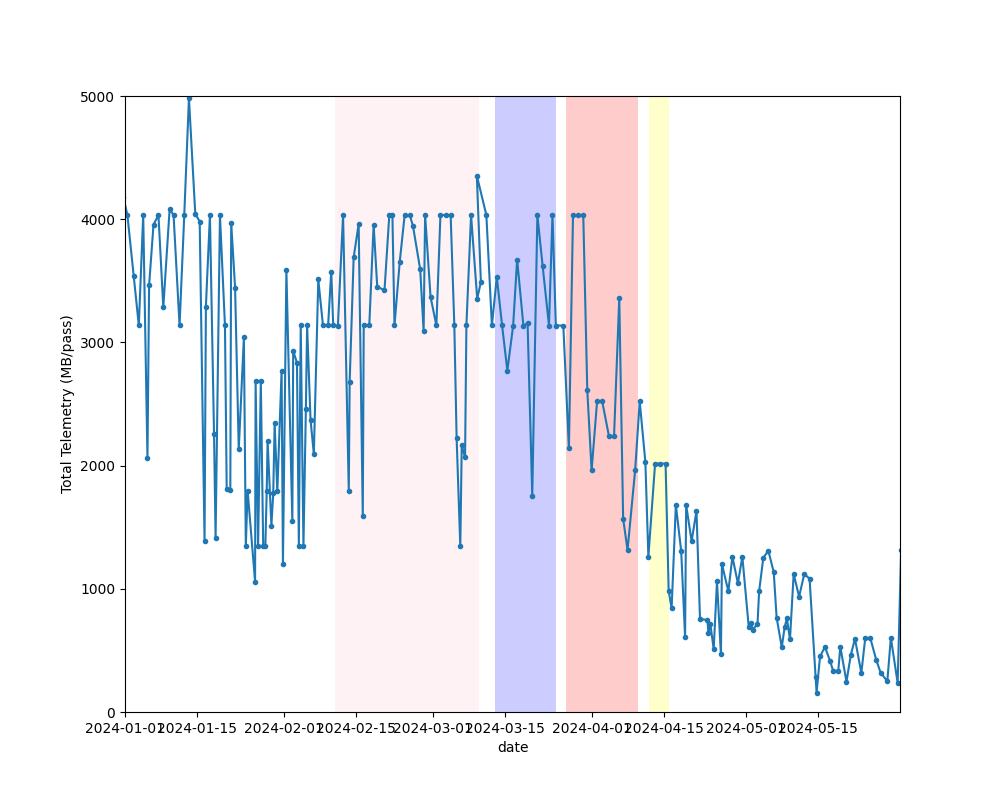

In [4]:
plt.figure(figsize=(10,8))
plt.plot(TM3['date'], (TM3['tm_rate']*TM3['duration'])/8/1e6,'.-')#; plt.ylim(0,5000)
plt.ylim(0,5000)
ylim = plt.gca().get_ylim()
plt.fill_betweenx(ylim,DT(2024,2,11),DT(2024,3,10),facecolor='pink',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,3,13),DT(2024,3,25),facecolor='blue',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,3,27),DT(2024,4,10),facecolor='red',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,4,12),DT(2024,4,16),facecolor='yellow',alpha=.2)
plt.xlim(datetime.date(2024,1,1),datetime.date(2024,5,31))
plt.ylabel('Total Telemetry (MB/pass)')
plt.xlabel('date')
plt.ylim(ylim)

# SYNOPTIC January - March

In [30]:
"""
2024-01-01T00:00:00.000 - 2024-02-11T00:00:00.000: 768, 41d
2024-02-11T00:00:00.000 - 2024-02-28T00:00:00.000: 896, 17d
2024-02-28T00:00:00.000 - 2024-03-08T00:00:00.000: 1024, 9d
2024-03-08T00:00:00.000 - 2024-03-14T00:00:00.000: 1152, 6d
"""

'\n2024-01-01T00:00:00.000 - 2024-02-11T00:00:00.000: 768, 41d\n2024-02-11T00:00:00.000 - 2024-02-28T00:00:00.000: 896, 17d\n2024-02-28T00:00:00.000 - 2024-03-08T00:00:00.000: 1024, 9d\n2024-03-08T00:00:00.000 - 2024-03-14T00:00:00.000: 1152, 6d\n'

In [31]:
t0 = DT(2024,1,1,0,0,0)
t1 = DT(2024,2,11,0,0,0)
th1 = DT(2024,2,13,0,0,0)
th2 = DT(2024,2,26,0,0,0)
t2 = DT(2024,2,28,0,0,0)
t3 = DT(2024,3,8,0,0,0)
tend = DT(2024,3,12,0,0,0)
# tend = t1

PHI = PHI_MEMORY(t0-TD(days=1))
id = 1

# SYN = PHI_MODE('FDT')
# SYNH = PHI_MODE('HRT')

synoptic_raw(PHI,'FDT',t0,t1,360,(2048,768,4,6),6,id)
synoptic_raw(PHI,'FDT',t1,th1,360,(2048,896,4,6),6,id)
# synoptic_raw(PHI,'FDT',th2,t2,360,(2048,896,4,6),6,id)
# synoptic_raw(PHI,'FDT',t2,t3,360,(2048,1024,4,6),6,id)
# synoptic_raw(PHI,'FDT',t3,tend,360,(2048,1152,4,6),6,id)


print('Total telemetry (no H/K) in',int((th1-t0).total_seconds()/60/60/24),'days:',roundup(PHI.part1.compr*1e6/2**20,1),'MiB')
print('Average telemetry (no H/K):',roundup(PHI.part1.compr*1e6/2**20/((th1-t0).total_seconds()/60/60/24),1),'MiB/day')
print('Memory used:',roundup(PHI.part1.occu/1e3,1),'GB')

Total telemetry (no H/K) in 43 days: 1800 MiB
Average telemetry (no H/K): 42 MiB/day
Memory used: 35 GB


/home/calchetti/MPStemp/PHI_TMtool/TMclass.py:1210: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axi.plot_date(x,c,color='orange',linestyle='-',marker='<',label='compressed')


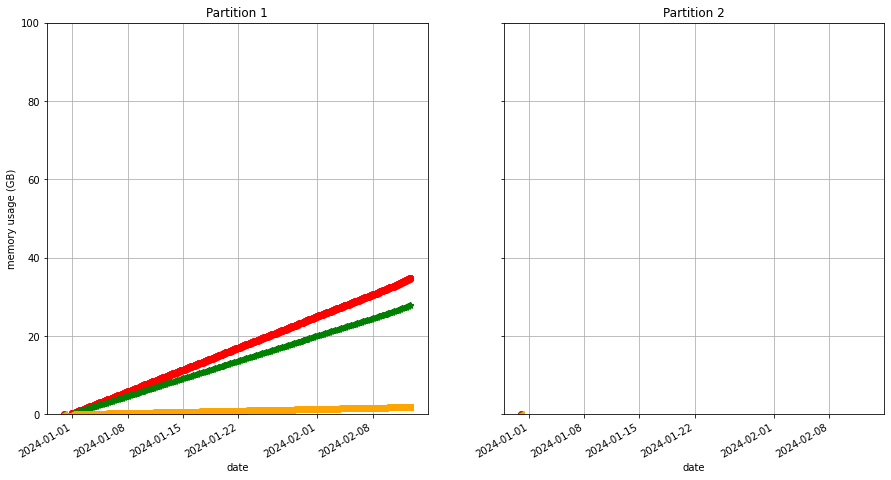

In [32]:
xlim = (DT(2024,1,1,0,0,0),DT(2024,3,15,0,0,0))
plot_tot(PHI, xlim=None, ylim=(0,100), time_ord=True)

# <span style="color:white">*out of RSWs*</span>

## <span style="color:pink">R_FULL_LRES_HCAD_Full-Disk-Helioseismology</span>

CROP+PACK


In [33]:
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
PHI.format_partition(1,DT(2024,2,13,12,0,0))
t0 = DT.fromisoformat('2024-02-14T00:00:00')
t1 = DT.fromisoformat('2024-02-16T10:20:00')
# PHI = PHI_MEMORY(t0)
# phi = PHI_MEMORY(t0)

hcrop = 768
hsm_1 = PHI_MODE('FDT')
kw = hsm_1.observation(t0,t1,cadence=1,shape=(2048,hcrop,1,6)); PHI.saving(1,**kw)

# t0 = hsm_1.raw.end

# PHI.copy_partition(1,t0)
# PHI.format_partition(1,PHI.part1.history['end'][-1])


t0 = DT.fromisoformat('2024-02-16T10:20:00')
t1 = DT.fromisoformat('2024-02-18T20:40:00')
hsm_2 = PHI_MODE('FDT')
kw = hsm_2.observation(t0,t1,cadence=1,shape=(2048,hcrop,1,6)); PHI.saving(2,**kw)

t0 = DT(2024,2,19,12,0,0)

kw = hsm_1.cropping(t0,ndata=1400,crop=[hcrop,hcrop],level='raw');# PHI.saving(1,**kw)
kw = hsm_1.packing(t0,ndata=1400,level='raw.crop'); PHI.saving(1,**kw)
kw = hsm_1.cropping(t0+TD(days=2),ndata=1400,crop=[hcrop,hcrop],level='raw');# PHI.saving(1,**kw)
kw = hsm_1.packing(t0+TD(days=2),ndata=1400,level='raw.crop'); PHI.saving(1,**kw)
kw = hsm_1.cropping(t0+TD(days=4),ndata=700,crop=[hcrop,hcrop],level='raw');# PHI.saving(1,**kw)
kw = hsm_1.packing(t0+TD(days=4),ndata=700,level='raw.crop'); PHI.saving(1,**kw)

# kw = hsm_1.compressing(hsm_1.raw.pack.end, nbits = 6, ndata = 1400,level='raw.crop.pack'); PHI.saving(1,**kw)
# hsm_1, kw = flush_many(PHI,[1350,1350], 2.4, hsm_1, kw['end'], 6, -1, 'raw.crop.pack',1)

kw = hsm_2.cropping(hsm_1.raw.crop.pack.end,ndata=700,crop=[hcrop,hcrop],level='raw');# PHI.saving(1,**kw)
kw = hsm_2.packing(hsm_1.raw.crop.pack.end,ndata=700,level='raw.crop'); PHI.saving(2,**kw)
kw = hsm_2.cropping(t0+TD(days=6),ndata=1400,crop=[hcrop,hcrop],level='raw');# PHI.saving(1,**kw)
kw = hsm_2.packing(t0+TD(days=6),ndata=1400,level='raw.crop'); PHI.saving(2,**kw)
kw = hsm_2.cropping(t0+TD(days=8),ndata=1400,crop=[hcrop,hcrop],level='raw');# PHI.saving(1,**kw)
kw = hsm_2.packing(t0+TD(days=8),ndata=1400,level='raw.crop'); PHI.saving(2,**kw)

# kw = hsm_2.compressing(hsm_1.raw.crop.pack.compr.end, nbits = 6, ndata = -1,level='raw.crop.pack'); PHI.saving(2,**kw)
# hsm_2, kw = flush_many(PHI,[1350,1350], 2.4, hsm_2, kw['end'], 6, -1, 'raw.crop.pack',2)

t0 = DT(2024,2,20,12,0,0)

kw = hsm_1.compressing(t0, nbits = 6, ndata = 1400,level='raw.crop.pack'); PHI.saving(1,**kw)
kw = hsm_1.compressing(t0+TD(days=2), nbits = 6, ndata = 1400,level='raw.crop.pack'); PHI.saving(1,**kw)
kw = hsm_1.compressing(t0+TD(days=4), nbits = 6, ndata = 700,level='raw.crop.pack'); PHI.saving(1,**kw)

kw = hsm_2.compressing(kw['end'], nbits = 6, ndata = 700,level='raw.crop.pack'); PHI.saving(2,**kw)
kw = hsm_2.compressing(t0+TD(days=6), nbits = 6, ndata = 1400,level='raw.crop.pack'); PHI.saving(2,**kw)
kw = hsm_2.compressing(t0+TD(days=8), nbits = 6, ndata = 1400,level='raw.crop.pack'); PHI.saving(2,**kw)

end = kw['end']
########################################################
printp(hsm_1, label='R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 1')
print('==========================\n')
printp(hsm_2, label='R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 2')
# plot_tot(PHI)

amount of compressed data + metadata in partition 1: 1.89 GB
R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 1
number of datasets: 3500
cadence: 1 mins
duration: 2 days, 10:20:00
amount of raw-data at 32 bits: 160217.3 MiB, 45.8 MiB per dataset
crop size: 768
amount of crop-data at 32 bits: 80108.6 MiB, 22.9 MiB per dataset
cropping time: 1 day, 10:01:40
amount of pack-data at 16 bits: 53405.8 MiB, 15.3 MiB per dataset
packing time: 1 day, 19:45:00
amount of compressed data + metadata at 6 bits: 9255.2 MiB, 2.6 MiB per dataset
compressing (+ flushing) time: 21:33:58.048768
amount of metadata:  39270.0 MiB
amount of memory usage: 293731.7 MiB


R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 2
number of datasets: 3500
cadence: 1 mins
duration: 2 days, 10:20:00
amount of raw-data at 32 bits: 160217.3 MiB, 45.8 MiB per dataset
crop size: 768
amount of crop-data at 32 bits: 80108.6 MiB, 22.9 MiB per dataset
cropping time: 1 day, 10:01:40
amount of pack-data at 16 bits: 53405.

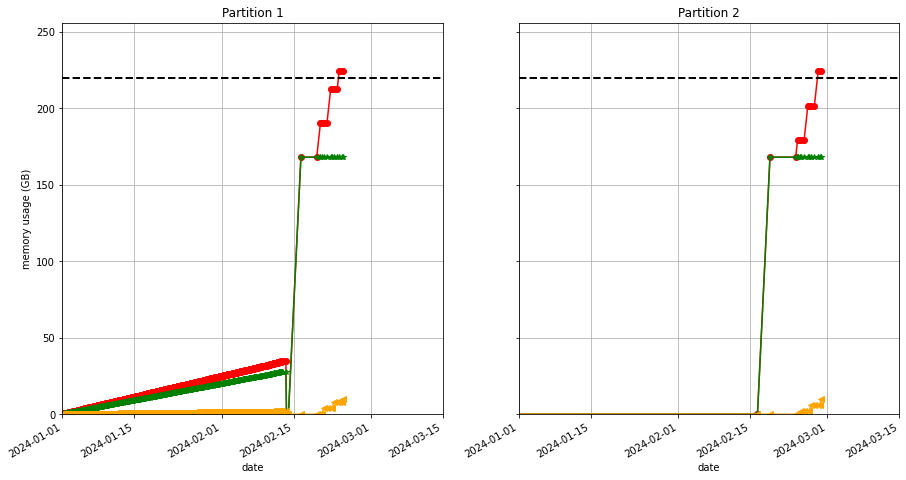

In [34]:
plot_tot(PHI,ylim=(0,256),xlim=(DT(2024,1,1),DT(2024,3,15)))

## <span style="color:magenta">***RESET NANDs (with Synoptics)***</span>

In [35]:
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr + PHI.part2.compr)/2151.3,2), 'days')
# PHI.format_partition(1,DT(2023,1,29,16,0,0))
# PHI.format_partition(2,end + TD(hours=1))
# PHI.format_partition(1,end + TD(hours=1))
# PHI.format_partition(2,PHI.part1.history['end'][-1] + TD(hours=.5))
PHI.format_partition(1,DT(2024,2,25,1,0,0))
PHI.format_partition(2,DT(2024,3,1,1,0,0))


amount of compressed data + metadata in partition 1: 9.7 GB
amount of compressed data + metadata in partition 2: 9.7 GB


## SYNOPTICS

In [36]:
t0 = DT(2024,1,1,0,0,0)
t1 = DT(2024,2,11,0,0,0)
th1 = DT(2024,2,13,0,0,0)
th2 = DT(2024,2,26,0,0,0)
t2 = DT(2024,2,28,0,0,0)
t3 = DT(2024,3,8,0,0,0)
tend = DT(2024,3,12,0,0,0)
# tend = t1

# PHI = PHI_MEMORY(t0-TD(days=1))
id = 1

# SYN = PHI_MODE('FDT')
# SYNH = PHI_MODE('HRT')

# synoptic_raw(PHI,'FDT',t0,t1,360,(2048,768,4,6),6,id)
# synoptic_raw(PHI,'FDT',t1,th1,360,(2048,896,4,6),6,id)
synoptic_raw(PHI,'FDT',th2,t2,360,(2048,896,4,6),6,id)
synoptic_raw(PHI,'FDT',t2,t3,360,(2048,1024,4,6),6,id)
synoptic_raw(PHI,'FDT',t3,tend,360,(2048,1152,4,6),6,id)


print('Total telemetry (no H/K) in',int((tend-th2).total_seconds()/60/60/24),'days:',roundup(PHI.part1.compr*1e6/2**20,1),'MiB')
print('Average telemetry (no H/K):',roundup(PHI.part1.compr*1e6/2**20/((tend-th2).total_seconds()/60/60/24),1),'MiB/day')
print('Memory used:',roundup(PHI.part1.occu/1e3,1),'GB')

Total telemetry (no H/K) in 15 days: 1137 MiB
Average telemetry (no H/K): 76 MiB/day
Memory used: 17 GB


## <span style="color:pink">SPICE-Full-Disk-Mosaic</span>

In [37]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-02-26T00:00:00')
t1 = t0 + TD(minutes=175) #25 datasets
spice = PHI_MODE('HRT')

kw = spice.observation(t0,25,cadence=7,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = spice.packing(DT(2024,2,26,12,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = spice.compressing(DT(2024,2,27,0,15,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

########################################################
printp(spice, label='SPICE full Mosaic')


SPICE full Mosaic
number of datasets: 25
cadence: 7 mins
duration: 2:55:00
amount of raw-data at 32 bits: 9918.2 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 5149.8 MiB, 206.0 MiB per dataset
packing time: 0:37:30
amount of compressed data + metadata at 6 bits: 1815.0 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 4:13:45.190861
amount of metadata:  402.5 MiB
amount of memory usage: 15068.1 MiB



## <span style="color:pink">R_SMALL_HRES_MCAD_Full-Disk-Mosaic</span>

In [38]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-03-10T00:00:00')
t1 = t0 + TD(minutes=175) #25 datasets
crazy = PHI_MODE('HRT')

kw = crazy.observation(t0,25,cadence=7,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = crazy.packing(DT(2024,3,10,12,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = crazy.compressing(DT(2024,3,11,0,15,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

########################################################
printp(crazy, label='Crazy Mosaic')


Crazy Mosaic
number of datasets: 25
cadence: 7 mins
duration: 2:55:00
amount of raw-data at 32 bits: 9918.2 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 5149.8 MiB, 206.0 MiB per dataset
packing time: 0:37:30
amount of compressed data + metadata at 6 bits: 1815.0 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 4:13:45.190861
amount of metadata:  402.5 MiB
amount of memory usage: 15068.1 MiB



## <span style="color:magenta">***RESET NAND 1***</span>

In [39]:
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
# print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr + PHI.part2.compr)/2151.3,2), 'days')
# PHI.format_partition(1,DT(2023,1,29,16,0,0))
# PHI.format_partition(2,end + TD(hours=1))
# PHI.format_partition(1,end + TD(hours=1))
# PHI.format_partition(2,PHI.part1.history['end'][-1] + TD(hours=.5))
PHI.format_partition(1,DT(2024,3,11,15,0,0))
# PHI.format_partition(2,DT(2024,3,1,1,0,0))


amount of compressed data + metadata in partition 1: 5.0 GB


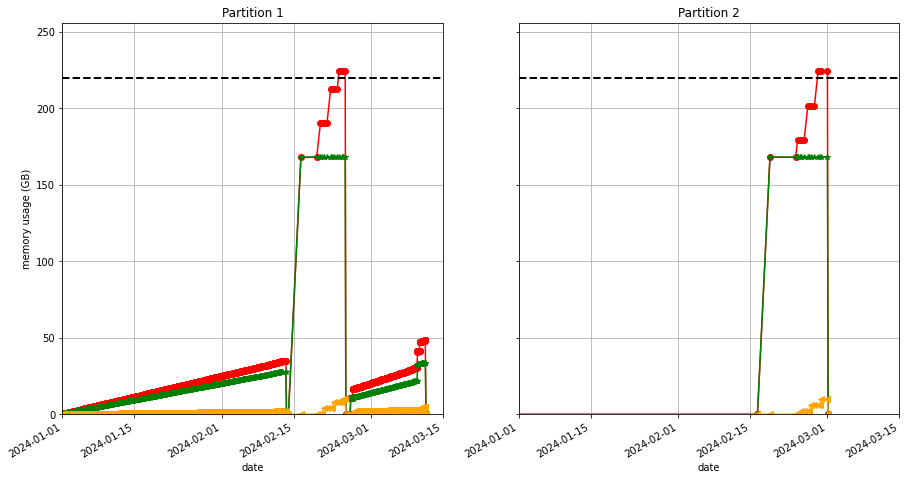

In [40]:
plot_tot(PHI,ylim=(0,256),xlim=(DT(2024,1,1),DT(2024,3,15)))

## <span style="color:green">FDT Flat 1 </span>

In [41]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-03-12T00:00:00')
FDTflat1 = FDT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,3,12,21,0,0),verbose=False)
########################################################
printp(FDTflat1, label="FDT FLAT 1 (12/03/2024)")

FDT FLAT 1 (12/03/2024)
number of datasets: 10
cadence: 300.0 mins
duration: 5:00:00
amount of raw-data at 32 bits: 3967.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4173.3 MiB



## <span style="color:green">HRT Flat 1 </span>

In [42]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-03-12T08:00:00')
HRTflat1 = HRT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,3,12,21,15,0),verbose=False)
########################################################
printp(HRTflat1, label="HRT FLAT 1 (12/03/2024)")

HRT FLAT 1 (12/03/2024)
number of datasets: 11
cadence: 15.0 mins
duration: 0:15:00
amount of raw-data at 32 bits: 4364.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4570.0 MiB



# <span style="color:orange">*RSW 13*</span>

## <span style="color:blue">Eruption Watch 1</span>

In [43]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-13T00:00:00')
t1 = DT.fromisoformat('2024-03-17T00:00:00')
crop = 1280
EW1 = PHI_MODE('FDT')
# EW1 = synoptic_raw(PHI,'FDT',t0,t1,360,(2048,crop,4,6),6,id)
kw = EW1.observation(t0,t1,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
for i in range(4):
    kw = EW1.cropping(DT(2024,3,14,5,0,0)+TD(days=i),crop=[crop,crop],ndata=4,level='raw')#; PHI.saving(id,**kw)
    kw = EW1.packing(kw['start'],ndata=4,level='raw.crop',); PHI.saving(id,**kw)
    kw = EW1.compressing(DT(2024,3,14,7,0,0)+TD(days=i),ndata=4,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,CD1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(EW1, label='Eruption Watch 1')


Eruption Watch 1
number of datasets: 16
cadence: 360 mins
duration: 4 days, 0:00:00
amount of raw-data at 32 bits: 4028.3 MiB, 251.8 MiB per dataset
crop size: 1280
amount of crop-data at 32 bits: 2563.5 MiB, 160.2 MiB per dataset
cropping time: 0:18:40
amount of pack-data at 16 bits: 1342.8 MiB, 83.9 MiB per dataset
packing time: 0:24:00
amount of compressed data + metadata at 6 bits: 454.7 MiB, 28.4 MiB per dataset
compressing (+ flushing) time: 1:03:34.097716
amount of metadata:  192.4 MiB
amount of memory usage: 7934.6 MiB



## <span style="color:blue">Composition vs Height</span>

In [44]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-18T00:00:00')
# t1 = DT.fromisoformat('2024-03-1T00:00:00')
crop = 1408
CvH = PHI_MODE('FDT')
# EW1 = synoptic_raw(PHI,'FDT',t0,t1,360,(2048,crop,4,6),6,id)
kw = CvH.observation(t0,4,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = CvH.cropping(DT(2024,3,18,19,0,0),crop=[crop,crop],ndata=4,level='raw')#; PHI.saving(id,**kw)
kw = CvH.packing(kw['start'],ndata=4,level='raw.crop',); PHI.saving(id,**kw)
kw = CvH.compressing(DT(2024,3,18,21,0,0),ndata=4,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,CD1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(CvH, label='Composition vs Height')


Composition vs Height
number of datasets: 4
cadence: 360 mins
duration: 1 day, 0:00:00
amount of raw-data at 32 bits: 1098.6 MiB, 274.7 MiB per dataset
crop size: 1408
amount of crop-data at 32 bits: 762.9 MiB, 190.7 MiB per dataset
cropping time: 0:04:40
amount of pack-data at 16 bits: 396.7 MiB, 99.2 MiB per dataset
packing time: 0:06:00
amount of compressed data + metadata at 6 bits: 137.5 MiB, 34.4 MiB per dataset
compressing (+ flushing) time: 0:19:13.092559
amount of metadata:  96.4 MiB
amount of memory usage: 2258.3 MiB



## <span style="color:blue">FDT CROSS CALIBRATION</span>
40 datasets at 100s cadence, averaging 4 datasets: 10 datasets to be flushed

In [45]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-19T12:00:00')
# t1 = DT.fromisoformat('2023-10-06T08:00:00')
DF1 = PHI_MODE('FDT')
crop = 1408

kw = DF1.observation(t0,40,cadence=100/60,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = DF1.cropping(DT(2024,3,19,18,0,0),crop=[crop,crop],ndata=10,level='raw')#; PHI.saving(id,**kw)
kw = DF1.packing(kw['start'],ndata=10,level='raw.crop',); PHI.saving(id,**kw)
kw = DF1.compressing(DT(2024,3,20,12,0,0),ndata=20,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)
kw = DF1.compressing(DT(2024,3,21,12,0,0),ndata=20,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(DF1, label='FDT cross calibration 1')


None WARNING: Compression, Exceeding the number of datasets, max should be 10
2024-03-20 12:00:00 WARNING: Compression, Exceeding the number of datasets, max should be -10
FDT cross calibration 1
number of datasets: 40
cadence: 1.6666666666666667 mins
duration: 1:06:40
amount of raw-data at 32 bits: 10986.3 MiB, 274.7 MiB per dataset
crop size: 1408
amount of crop-data at 32 bits: 1907.3 MiB, 190.7 MiB per dataset
cropping time: 0:11:40
amount of pack-data at 16 bits: 991.8 MiB, 99.2 MiB per dataset
packing time: 0:15:00
amount of compressed data + metadata at 6 bits: 1374.6 MiB, 34.4 MiB per dataset
compressing (+ flushing) time: 3:12:10.925588
amount of metadata:  482.0 MiB
amount of memory usage: 13885.5 MiB



## <span style="color:blue">Major Flare 1</span>

In [46]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-19T20:00:00')
t1 = DT.fromisoformat('2024-03-20T00:00:00')
DF1 = PHI_MODE('HRT')
crop = 2048

kw = DF1.observation(t0,t1,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
# kw = DF1.cropping(DT(2023,11,15,1,0,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
kw = DF1.packing(DT(2024,3,20,18,30,0),ndata=-1,level='raw',); PHI.saving(id,**kw)
kw = DF1.compressing(DT(2024,3,20,13,30,0),ndata=4,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
kw = DF1.compressing(DT(2024,3,21,13,30,0),ndata=4,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(DF1, label='Major Flare 1')


Major Flare 1
number of datasets: 8
cadence: 30 mins
duration: 4:00:00
amount of raw-data at 32 bits: 3173.8 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 1647.9 MiB, 206.0 MiB per dataset
packing time: 0:12:00
amount of compressed data + metadata at 6 bits: 580.8 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 1:21:12.061076
amount of metadata:  128.4 MiB
amount of memory usage: 4821.8 MiB



## <span style="color:blue">HRT CROSS CALIBRATION</span> <br>

In [47]:

t0 = DT.fromisoformat('2024-03-20T17:30:00')
t1 = DT.fromisoformat('2024-03-20T18:30:00')
id = 2
crop = 2048

CC = PHI_MODE('HRT')
CC12 = PHI_MODE('HRT')
kw = CC.observation(t0,t1,cadence=100/60,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
# 12 points scan observation
kw = CC12.observation(t0,1,cadence=5,shape=(2048,crop,4,12)); PHI.saving(id,**kw)

kw = CC.packing(DT(2024,3,20,20,0,0),ndata=-1,level='raw',); PHI.saving(id,**kw)
kw = CC12.packing(DT(2024,3,20,22,0,0),ndata=-1,level='raw',); PHI.saving(id,**kw)

kw = CC.compressing(DT(2024,3,22,12,0,0),ndata=13,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
kw = CC.compressing(DT(2024,3,23,3,30,0),ndata=13,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
kw = CC.compressing(DT(2024,3,24,6,0,0),ndata=10,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
kw = CC12.compressing(kw['end']+TD(minutes=5),ndata=1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)



printp(CC, label='HRT cross calibration')
printp(CC12,label='HRT 12 points scan')

HRT cross calibration
number of datasets: 36
cadence: 1.6666666666666667 mins
duration: 1:00:00
amount of raw-data at 32 bits: 14282.2 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 7415.8 MiB, 206.0 MiB per dataset
packing time: 0:54:00
amount of compressed data + metadata at 6 bits: 2613.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 6:05:24.274840
amount of metadata:  577.0 MiB
amount of memory usage: 21698.0 MiB

HRT 12 points scan
number of datasets: 1
cadence: 5 mins
duration: 0:05:00
amount of raw-data at 32 bits: 778.2 MiB, 778.2 MiB per dataset
amount of pack-data at 16 bits: 396.7 MiB, 396.7 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 145.1 MiB, 145.1 MiB per dataset
compressing (+ flushing) time: 0:20:17.215269
amount of metadata:  16.1 MiB
amount of memory usage: 1174.9 MiB



## <span style="color:blue">Composition Mosaic</span>

6 pointings (?)

12 datasets (6 pointings, 2 datasets each)

In [48]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-20T04:00:00')
t1 = DT.fromisoformat('2024-03-22T07:30:00')
CM1 = PHI_MODE('HRT')

#cadence from 30 to 60 for putting 3h high cadence
kw = CM1.observation(t0,12,cadence=60*3,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = CM1.packing(DT(2024,3,21,10,0,0),ndata=6,level = 'raw'); PHI.saving(id,**kw)
kw = CM1.compressing(kw['end']+TD(minutes=15),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
kw = CM1.packing(DT(2024,3,22,10,0,0),ndata=6,level = 'raw'); PHI.saving(id,**kw)
kw = CM1.compressing(kw['end']+TD(minutes=15),ndata=6,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

########################################################
printp(CM1, label='Compostion Mosaic')


Compostion Mosaic
number of datasets: 12
cadence: 180 mins
duration: 1 day, 12:00:00
amount of raw-data at 32 bits: 4760.7 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 2471.9 MiB, 206.0 MiB per dataset
packing time: 0:18:00
amount of compressed data + metadata at 6 bits: 871.2 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 2:01:48.091614
amount of metadata:  144.6 MiB
amount of memory usage: 7232.7 MiB



## <span style="color:blue">Sunspot Oscillations</span>
Match EUI high cadence burst (1h)

In [49]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-22T21:35:00')
t1 = DT.fromisoformat('2024-03-22T22:35:00')
SO = PHI_MODE('HRT')

#cadence from 30 to 60 for putting 3h high cadence
kw = SO.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = SO.packing(DT(2024,3,25,1,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = SO.compressing(kw['end']+TD(minutes=15),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

########################################################
printp(SO, label='Sunspot oscillations')


Sunspot oscillations
number of datasets: 10
cadence: 6 mins
duration: 1:00:00
amount of raw-data at 32 bits: 3967.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 2059.9 MiB, 206.0 MiB per dataset
packing time: 0:15:00
amount of compressed data + metadata at 6 bits: 726.0 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 1:41:30.076344
amount of metadata:  161.0 MiB
amount of memory usage: 6027.2 MiB



## <span style="color:blue">Limb Observation</span>
SOOP addedd by Susanna Parenti at SOWG

In [50]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-23T05:00:00')
# t1 = DT.fromisoformat('2024-03-22T22:35:00')
LO = PHI_MODE('HRT')
crop = 1792

#cadence from 30 to 60 for putting 3h high cadence
kw = LO.observation(t0,3,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = LO.cropping(DT(2024,3,23,19,0,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
kw = LO.packing(kw['start'],ndata=-1,level = 'raw.crop'); PHI.saving(id,**kw)
kw = LO.compressing(kw['end']+TD(minutes=15),ndata=-1,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

########################################################
printp(LO, label='Limb Observation')


Limb Observation
number of datasets: 3
cadence: 360 mins
duration: 18:00:00
amount of raw-data at 32 bits: 1052.9 MiB, 351.0 MiB per dataset
crop size: 1792
amount of crop-data at 32 bits: 915.5 MiB, 305.2 MiB per dataset
cropping time: 0:03:30
amount of pack-data at 16 bits: 480.7 MiB, 160.2 MiB per dataset
packing time: 0:04:30
amount of compressed data + metadata at 6 bits: 166.8 MiB, 55.6 MiB per dataset
compressing (+ flushing) time: 0:23:19.376910
amount of metadata:  72.3 MiB
amount of memory usage: 2449.0 MiB



## <span style="color:blue">Major Flare 2</span>

In [51]:
########################################################
id = 2
t0 = DT.fromisoformat('2024-03-23T22:30:00')
t1 = DT.fromisoformat('2024-03-24T02:30:00')
DF1 = PHI_MODE('HRT')
crop = 2048

kw = DF1.observation(t0,t1,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
# kw = DF1.cropping(DT(2023,11,15,1,0,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
kw = DF1.packing(DT(2024,3,24,4,30,0),ndata=-1,level='raw',); PHI.saving(id,**kw)
kw = DF1.compressing(DT(2024,3,26,0,30,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
# kw = DF1.compressing(DT(2024,3,24,20,30,0),ndata=4,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(DF1, label='Major Flare 2')


Major Flare 2
number of datasets: 8
cadence: 30 mins
duration: 4:00:00
amount of raw-data at 32 bits: 3173.8 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 1647.9 MiB, 206.0 MiB per dataset
packing time: 0:12:00
amount of compressed data + metadata at 6 bits: 580.8 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 1:21:12.061075
amount of metadata:  128.8 MiB
amount of memory usage: 4821.8 MiB



## <span style="color:magenta">***RESET NAND 2***</span>

In [52]:
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
PHI.format_partition(2,DT(2024,3,26,3,0,0))


amount of compressed data + metadata in partition 2: 8.02 GB


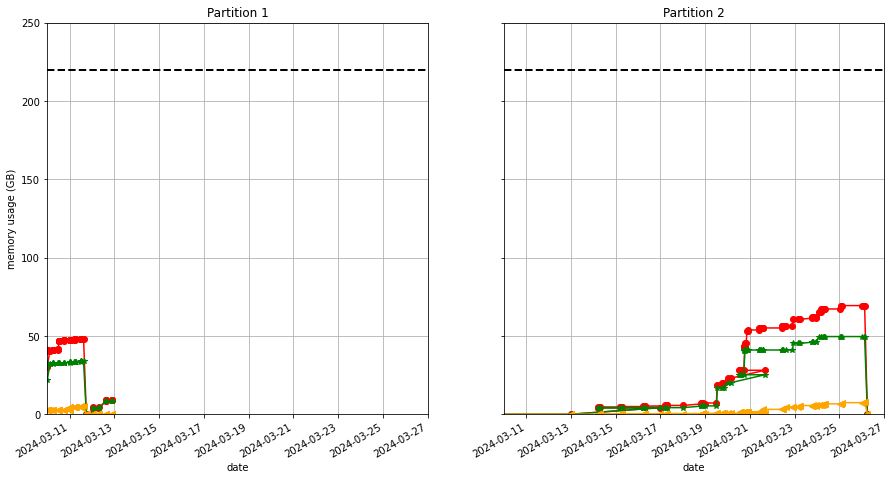

In [53]:
xlim = (DT(2024,3,10,0,0,0),DT(2024,3,27,0,0,0))
plot_tot(PHI, xlim=xlim, ylim=(0,250), time_ord=True)

# <span style="color:red">*RSW 14*</span>

## <span style="color:green">HRT Flat 2 </span>

In [54]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-03-26T10:00:00')
HRTflat1 = HRT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,3,27,22,0,0),verbose=False)
########################################################
printp(HRTflat1, label="HRT FLAT 2 (26/03/2024)")

HRT FLAT 2 (26/03/2024)
number of datasets: 11
cadence: 15.0 mins
duration: 0:15:00
amount of raw-data at 32 bits: 4364.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4570.0 MiB



## <span style="color:green">FDT Flat 2 </span>

In [55]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-03-26T22:00:00')
FDTflat1 = FDT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,3,27,22,30,0),verbose=False)
########################################################
printp(FDTflat1, label="FDT FLAT 2 (26/03/2024)")

FDT FLAT 2 (26/03/2024)
number of datasets: 10
cadence: 300.0 mins
duration: 5:00:00
amount of raw-data at 32 bits: 3967.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4173.3 MiB



## <span style="color:brown">PSP quadrature 1 + L_BOTH_HRES_LCAD_CH-Boundary-Expansion</span>


In [56]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-03-27T00:00:00')
t1 = DT.fromisoformat('2024-03-29T06:35:00')
crop = 1920

CH1 = PHI_MODE('FDT')
# CH1 = synoptic_raw(PHI,'FDT',t0,t1,360,(2048,crop,4,6),6,id)
kw = CH1.observation(t0,t1,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
for i,n in zip(range(3),[3,3,4]):
    kw = CH1.cropping(DT(2024,3,27,20,0,0)+TD(days=i),crop=[crop,crop],ndata=n,level='raw')#; PHI.saving(id,**kw)
    kw = CH1.packing(kw['start'],ndata=n,level='raw.crop',); PHI.saving(id,**kw)
    kw = CH1.compressing(DT(2024,3,27,23,0,0)+TD(days=i),ndata=n,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,CD1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(CH1, label='PSP quadrature + CH Boundary Expansion 1')



2024-03-28 20:00:00 WARNING: Cropping, Exceeding the number of datasets, max should be 3
PSP quadrature + CH Boundary Expansion 1
number of datasets: 9
cadence: 360 mins
duration: 2 days, 6:35:00
amount of raw-data at 32 bits: 3364.6 MiB, 373.8 MiB per dataset
crop size: 1920
amount of crop-data at 32 bits: 3509.5 MiB, 351.0 MiB per dataset
cropping time: 0:11:40
amount of pack-data at 16 bits: 1831.1 MiB, 183.1 MiB per dataset
packing time: 0:15:00
amount of compressed data + metadata at 6 bits: 638.2 MiB, 63.8 MiB per dataset
compressing (+ flushing) time: 1:29:13.574913
amount of metadata:  136.4 MiB
amount of memory usage: 8705.1 MiB



## <span style="color:brown">L_FULL_LRES_MCAD_Probe-Quadrature</span>


In [57]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-03-29T07:10:00')
t1 = DT.fromisoformat('2024-03-29T16:40:00')
PSP = PHI_MODE('HRT')
crop = 2048

kw = PSP.observation(t0,2,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = PSP.packing(DT(2024,3,29,15,30,0),ndata=-1,level='raw',); PHI.saving(id,**kw)
kw = PSP.compressing(DT(2024,3,29,21,0,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)


########################################################
printp(PSP, label='PSP quadrature')



PSP quadrature
number of datasets: 2
cadence: 360 mins
duration: 12:00:00
amount of raw-data at 32 bits: 793.5 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 412.0 MiB, 206.0 MiB per dataset
packing time: 0:03:00
amount of compressed data + metadata at 6 bits: 145.2 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:20:18.015269
amount of metadata:  32.2 MiB
amount of memory usage: 1205.4 MiB



## <span style="color:brown">Density Fluctuations</span>


In [58]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-03-29T16:00:00')
t1 = DT.fromisoformat('2024-03-31T07:00:00')
crop = 1920

DF = PHI_MODE('FDT')
# CH1 = synoptic_raw(PHI,'FDT',t0,t1,360,(2048,crop,4,6),6,id)
kw = DF.observation(t0,t1,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
for i,n in zip(range(2),[3,3]):
    kw = DF.cropping(DT(2024,3,30,14,0,0)+TD(days=i),crop=[crop,crop],ndata=n,level='raw')#; PHI.saving(id,**kw)
    kw = DF.packing(kw['start'],ndata=n,level='raw.crop',); PHI.saving(id,**kw)
    kw = DF.compressing(DT(2024,3,30,16,0,0)+TD(days=i),ndata=n,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

########################################################
printp(DF, label='Density Fluctuations')


Density Fluctuations
number of datasets: 6
cadence: 360 mins
duration: 1 day, 15:00:00
amount of raw-data at 32 bits: 2243.0 MiB, 373.8 MiB per dataset
crop size: 1920
amount of crop-data at 32 bits: 2105.7 MiB, 351.0 MiB per dataset
cropping time: 0:07:00
amount of pack-data at 16 bits: 1098.6 MiB, 183.1 MiB per dataset
packing time: 0:09:00
amount of compressed data + metadata at 6 bits: 382.9 MiB, 63.8 MiB per dataset
compressing (+ flushing) time: 0:53:32.144948
amount of metadata:  96.3 MiB
amount of memory usage: 5447.4 MiB



## <span style="color:green">FDT Flat 3 </span>

In [59]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-03-30T05:00:00')
FDTflat1 = FDT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,3,31,16,0,0),verbose=False)
########################################################
printp(FDTflat1, label="FDT FLAT 3 (30/03/2024)")

FDT FLAT 3 (30/03/2024)
number of datasets: 10
cadence: 300.0 mins
duration: 5:00:00
amount of raw-data at 32 bits: 3967.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4173.3 MiB



## <span style="color:green">HRT Flat 3 </span>

In [60]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-03-30T20:00:00')
HRTflat1 = HRT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,3,31,16,30,0),verbose=False)
########################################################
printp(HRTflat1, label="HRT FLAT 3 (30/03/2024)")

HRT FLAT 3 (30/03/2024)
number of datasets: 11
cadence: 15.0 mins
duration: 0:15:00
amount of raw-data at 32 bits: 4364.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4570.0 MiB



## <span style="color:brown">Fast Wind</span>


In [61]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-03-31T09:00:00')
t1 = DT.fromisoformat('2024-04-03T20:00:00')
FW2 = PHI_MODE('HRT')

kw = FW2.observation(t0,2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = FW2.observation(t0,8,cadence=1,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
# kw = FW2.binning(kw['end']+TD(minutes=10),2,ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.packing(DT(2024,3,31,16,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.compressing(DT(2024,3,31,23,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)
kw = FW2.compressing(DT(2024,4,1,17,0,0),ndata=8,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = FW2.observation(t0+TD(days=1),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
# kw = FW2.binning(kw['end']+TD(minutes=10),2,ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.packing(DT(2024,4,1,16,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.compressing(DT(2024,4,1,23,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = FW2.observation(t0+TD(days=2),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
# kw = FW2.binning(kw['end']+TD(minutes=10),2,ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.packing(DT(2024,4,2,16,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.compressing(DT(2024,4,2,23,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = FW2.observation(t0+TD(days=3),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
# kw = FW2.binning(kw['end']+TD(minutes=10),2,ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.packing(DT(2024,4,3,14,0,0),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
kw = FW2.compressing(DT(2024,4,3,16,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

########################################################
printp(FW2, label='Fast Wind')


Fast Wind
number of datasets: 16
cadence: 30 mins
duration: 1:00:00
amount of raw-data at 32 bits: 6347.7 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 3295.9 MiB, 206.0 MiB per dataset
packing time: 0:24:00
amount of compressed data + metadata at 6 bits: 1161.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 2:42:24.122151
amount of metadata:  32.2 MiB
amount of memory usage: 9643.6 MiB



## <span style="color:brown">Major Flare 2.5</span>

In [62]:
# ########################################################
# id = 1
# t0 = DT.fromisoformat('2024-04-01T20:00:00')
# t1 = DT.fromisoformat('2024-04-02T00:00:00')
# DF1 = PHI_MODE('HRT')
# crop = 2048

# kw = DF1.observation(t0,t1,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
# # kw = DF1.cropping(DT(2023,11,15,1,0,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
# kw = DF1.packing(DT(2024,4,2,2,0,0),ndata=-1,level='raw',); PHI.saving(id,**kw)
# kw = DF1.compressing(DT(2024,4,2,17,30,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
# # kw = DF1.compressing(DT(2024,3,24,20,30,0),ndata=4,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

# # synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

# ########################################################
# printp(DF1, label='Major Flare 2.5')


## <span style="color:brown">Major Flare 3</span>

In [63]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-04-02T20:00:00')
t1 = DT.fromisoformat('2024-04-03T00:00:00')
DF1 = PHI_MODE('HRT')
crop = 2048

kw = DF1.observation(t0,t1,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
# kw = DF1.cropping(DT(2023,11,15,1,0,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
kw = DF1.packing(DT(2024,4,3,2,0,0),ndata=-1,level='raw',); PHI.saving(id,**kw)
kw = DF1.compressing(DT(2024,4,3,15,30,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
# kw = DF1.compressing(DT(2024,3,24,20,30,0),ndata=4,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

# synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(DF1, label='Major Flare 3')


Major Flare 3
number of datasets: 8
cadence: 30 mins
duration: 4:00:00
amount of raw-data at 32 bits: 3173.8 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 1647.9 MiB, 206.0 MiB per dataset
packing time: 0:12:00
amount of compressed data + metadata at 6 bits: 580.8 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 1:21:12.061075
amount of metadata:  128.8 MiB
amount of memory usage: 4821.8 MiB



## <span style="color:brown">RS-burst AR</span> <br>

crop to 1280x1280

In [64]:
t0 = DT.fromisoformat('2024-04-03T20:00:00')
t1 = DT.fromisoformat('2024-04-04T02:00:00')
id = 1
crop = 1792

L1 = PHI_MODE('HRT')
kw = L1.observation(t0,t0+TD(minutes=90),cadence=5,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = L1.observation(kw['end'],kw['end']+TD(minutes=120),cadence=1,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = L1.observation(kw['end'],kw['end']+TD(minutes=60),cadence=5,shape=(2048,crop,4,6)); PHI.saving(id,**kw)

kw = L1.cropping(DT(2024,4,4,12,30,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
kw = L1.packing(DT(2024,4,4,12,30,0),ndata=-1,level='raw.crop',); PHI.saving(id,**kw)

for i in range(10):
    kw = L1.compressing(DT(2024,4,5,2,30,0)+TD(days=i),ndata=15,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)
# kw = L1.compressing(DT(2024,4,5,2,30,0)+TD(days=9),ndata=15,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)

printp(L1, label='RS Burst 1')

RS Burst 1
number of datasets: 150
cadence: 5 mins
duration: 1:00:00
amount of raw-data at 32 bits: 52642.8 MiB, 351.0 MiB per dataset
crop size: 1792
amount of crop-data at 32 bits: 45776.4 MiB, 305.2 MiB per dataset
cropping time: 2:55:00
amount of pack-data at 16 bits: 24032.6 MiB, 160.2 MiB per dataset
packing time: 3:45:00
amount of compressed data + metadata at 6 bits: 8340.9 MiB, 55.6 MiB per dataset
compressing (+ flushing) time: 19:26:08.845520
amount of metadata:  2497.5 MiB
amount of memory usage: 122451.8 MiB



## <span style="color:green">HRT Flat 4 </span>

In [65]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-04-04T02:00:00')
HRTflat1 = HRT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,4,5,16,0,0),verbose=False)
########################################################
printp(HRTflat1, label="HRT FLAT 4 (04/04/2024)")

HRT FLAT 4 (04/04/2024)
number of datasets: 11
cadence: 15.0 mins
duration: 0:15:00
amount of raw-data at 32 bits: 4364.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4570.0 MiB



## <span style="color:brown">EUI/SPICE burst</span>

In [66]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-04-04T15:02:00')
QS = PHI_MODE('HRT')
crop = 2048

kw = QS.observation(t0,1,cadence=2,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = QS.packing(DT(2024,4,4,16,0,0),ndata=-1,level='raw',); PHI.saving(id,**kw)

kw = QS.compressing(DT(2024,4,5,6,0,0),ndata=1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
# synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(QS, label='Major Flare 4')


Major Flare 4
number of datasets: 1
cadence: 2 mins
duration: 0:02:00
amount of raw-data at 32 bits: 396.7 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 602.7 MiB



## <span style="color:brown">Major Flare 4</span>

In [67]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-04-04T20:00:00')
DF1 = PHI_MODE('HRT')
crop = 2048

kw = DF1.observation(t0,8,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = DF1.observation(t0+TD(days=1),8,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = DF1.observation(t0+TD(days=2),8,cadence=30,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
# kw = DF1.cropping(DT(2023,11,15,1,0,0),crop=[crop,crop],ndata=-1,level='raw')#; PHI.saving(id,**kw)
kw = DF1.packing(DT(2024,4,7,2,0,0),ndata=-1,level='raw',); PHI.saving(id,**kw)

for i in range(8):
    kw = DF1.compressing(DT(2024,4,6,3,30,0)+TD(days=i),ndata=2,nbits=6,level='raw.pack'); PHI.saving(id,**kw)

kw = DF1.compressing(DT(2024,4,15,3,30,0),ndata=8,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
# synoptic_raw(PHI,DF1,t0,t1,360,(2048,2048,4,6),6,id)

########################################################
printp(DF1, label='Major Flare 4')


Major Flare 4
number of datasets: 24
cadence: 30 mins
duration: 4:00:00
amount of raw-data at 32 bits: 9521.5 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 4943.8 MiB, 206.0 MiB per dataset
packing time: 0:36:00
amount of compressed data + metadata at 6 bits: 1742.4 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 4:03:36.183227
amount of metadata:  256.8 MiB
amount of memory usage: 14465.3 MiB



## <span style="color:brown">L_FULL_HRES_HCAD_Eruption-Watch</span>

In [68]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-04-07T00:00:00')
t1 = DT.fromisoformat('2024-04-10T00:00:00')
EQ = PHI_MODE('FDT')
crop = 1920

# cadence 60s to 100s to get some telemetry for high cadence
kw = EQ.observation(t0,t1,cadence=360,shape=(2048,crop,4,6)); PHI.saving(id,**kw)
kw = EQ.cropping(DT(2024,4,10,2,0,0),crop=crop,ndata=-1,level = 'raw');# phi.saving(id,**kw); PHI.saving(id,**kw)
kw = EQ.packing(kw['end']+TD(minutes=2),ndata=-1,level = 'raw.crop'); PHI.saving(id,**kw)

kw = EQ.compressing(DT(2024,4,16,20,0,0),ndata=-1,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)
# for i in range(6):
#     kw = EQ.compressing(DT(2024,4,7,4,0,0)+TD(days=i),ndata=2,nbits=6,level='raw.crop.pack'); PHI.saving(id,**kw)
########################################################
printp(EQ, label='Eruption Watch')


Eruption Watch
number of datasets: 12
cadence: 360 mins
duration: 3 days, 0:00:00
amount of raw-data at 32 bits: 4486.1 MiB, 373.8 MiB per dataset
crop size: 1920
amount of crop-data at 32 bits: 4211.4 MiB, 351.0 MiB per dataset
cropping time: 0:14:00
amount of pack-data at 16 bits: 2197.3 MiB, 183.1 MiB per dataset
packing time: 0:18:00
amount of compressed data + metadata at 6 bits: 765.8 MiB, 63.8 MiB per dataset
compressing (+ flushing) time: 1:47:04.289894
amount of metadata:  289.2 MiB
amount of memory usage: 10894.8 MiB



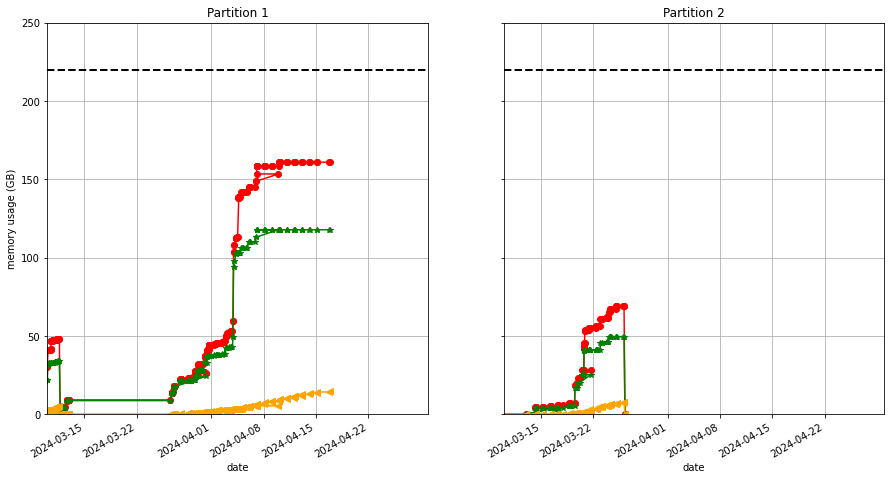

In [69]:
xlim = (DT(2024,3,10,0,0,0),DT(2024,4,30,0,0,0))
plot_tot(PHI, xlim=xlim, ylim=(0,250), time_ord=True)

# <span style="color:magenta">*RSW 15*</span>

## <span style="color:green">FDT Flat 4 </span>

In [70]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-04-10T00:00:00')
FDTflat1 = FDT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,4,15,16,30,0),verbose=False)
########################################################
printp(FDTflat1, label="FDT FLAT 4 (10/04/2024)")

FDT FLAT 4 (10/04/2024)
number of datasets: 10
cadence: 300.0 mins
duration: 5:00:00
amount of raw-data at 32 bits: 3967.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4173.3 MiB



## <span style="color:green">HRT Flat 5 </span>

In [71]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-04-11T10:00:00')
HRTflat1 = HRT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,4,15,16,50,0),verbose=False)
########################################################
printp(HRTflat1, label="HRT FLAT 5 (11/04/2024)")

HRT FLAT 5 (11/04/2024)
number of datasets: 11
cadence: 15.0 mins
duration: 0:15:00
amount of raw-data at 32 bits: 4364.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4570.0 MiB



## <span style="color:yellow">L_SMALL_HRES_HCAD_Slow-Wind-Connection</span>

In [72]:
########################################################
id = 1
t0 = DT.fromisoformat('2024-04-12T00:00:00')
t1 = DT.fromisoformat('2024-04-16T00:00:00')
SW = PHI_MODE('HRT')

kw = SW.observation(t0,2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = SW.packing(kw['end']+TD(minutes=30),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
# kw = SW.compressing(DT(2024,3,31,23,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = SW.observation(t0+TD(days=1),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = SW.packing(kw['end']+TD(minutes=30),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
# kw = SW.compressing(DT(2024,4,1,23,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = SW.observation(t0+TD(days=2),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = SW.packing(kw['end']+TD(minutes=30),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
# kw = SW.compressing(DT(2024,4,2,23,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = SW.observation(t0+TD(days=3),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
kw = SW.packing(kw['end']+TD(minutes=30),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
# kw = SW.compressing(DT(2024,4,3,16,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

# kw = SW.observation(t0+TD(days=4),2,cadence=30,shape=(2048,2048,4,6)); PHI.saving(id,**kw)
# kw = SW.packing(kw['end']+TD(minutes=30),ndata=-1,level = 'raw'); PHI.saving(id,**kw)
# # kw = SW.compressing(DT(2024,4,3,16,0,0),ndata=2,nbits=6,level = 'raw.pack'); PHI.saving(id,**kw)

kw = SW.compressing(DT(2024,4,17,4,0,0),ndata=-1,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
# for i in range(4):
#     kw = SW.compressing(DT(2024,4,18,4,0,0)+TD(days=i),ndata=2,nbits=6,level='raw.pack'); PHI.saving(id,**kw)
########################################################
printp(SW, label='Slow Wind')


Slow Wind
number of datasets: 8
cadence: 30 mins
duration: 1:00:00
amount of raw-data at 32 bits: 3173.8 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 1647.9 MiB, 206.0 MiB per dataset
packing time: 0:12:00
amount of compressed data + metadata at 6 bits: 580.8 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 1:21:12.061075
amount of metadata:  32.8 MiB
amount of memory usage: 4821.8 MiB



## <span style="color:green">FDT Flat 5 </span>

In [73]:
########################################################
id = 1

t0 = DT.fromisoformat('2024-04-16T00:00:00')
FDTflat1 = FDT_flat(PHI,t0,id,proc = 'auto', flush = DT(2024,4,17,21,30,0),verbose=False)
########################################################
printp(FDTflat1, label="FDT FLAT 5 (16/04/2024)")

FDT FLAT 5 (16/04/2024)
number of datasets: 10
cadence: 300.0 mins
duration: 5:00:00
amount of raw-data at 32 bits: 3967.3 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 206.0 MiB, 206.0 MiB per dataset
packing time: 0:01:30
amount of compressed data + metadata at 6 bits: 72.6 MiB, 72.6 MiB per dataset
compressing (+ flushing) time: 0:10:09.007634
amount of metadata:  16.1 MiB
amount of memory usage: 4173.3 MiB



# <span style="color:white">*out of RSWs*</span>

In [74]:
"""
2024-04-16T00:00:00.000 - 2024-04-17T00:00:00.000: 1536, 2d
2024-04-18T00:00:00.000 - 2024-04-21T00:00:00.000: 1408, 4d
2024-04-22T00:00:00.000 - 2024-04-25T00:00:00.000: 1280, 4d
2024-04-26T00:00:00.000 - 2024-05-01T00:00:00.000: 1152, 6d
2024-05-02T00:00:00.000 - 2024-05-10T00:00:00.000: 1024, 9d
2024-05-11T00:00:00.000 - 2024-05-26T00:00:00.000: 896, 16d
2024-05-27T00:00:00.000 - 2024-08-08T00:00:00.000: 768, 74d
2024-08-09T00:00:00.000 - 2024-08-25T00:00:00.000: 896, 17d
2024-08-26T00:00:00.000 - 2024-09-03T00:00:00.000: 1024, 9d
2024-09-04T00:00:00.000 - 2024-09-09T00:00:00.000: 1152, 6d
2024-09-10T00:00:00.000 - 2024-09-13T00:00:00.000: 1280, 4d
2024-09-14T00:00:00.000 - 2024-09-17T00:00:00.000: 1408, 4d
2024-09-18T00:00:00.000 - 2024-09-19T00:00:00.000: 1536, 2d
2024-09-20T00:00:00.000 - 2024-09-22T00:00:00.000: 1664, 3d
2024-09-23T00:00:00.000 - 2024-09-24T00:00:00.000: 1792, 2d
2024-09-25T00:00:00.000: Beginning of RSW
"""

'\n2024-04-16T00:00:00.000 - 2024-04-17T00:00:00.000: 1536, 2d\n2024-04-18T00:00:00.000 - 2024-04-21T00:00:00.000: 1408, 4d\n2024-04-22T00:00:00.000 - 2024-04-25T00:00:00.000: 1280, 4d\n2024-04-26T00:00:00.000 - 2024-05-01T00:00:00.000: 1152, 6d\n2024-05-02T00:00:00.000 - 2024-05-10T00:00:00.000: 1024, 9d\n2024-05-11T00:00:00.000 - 2024-05-26T00:00:00.000: 896, 16d\n2024-05-27T00:00:00.000 - 2024-08-08T00:00:00.000: 768, 74d\n2024-08-09T00:00:00.000 - 2024-08-25T00:00:00.000: 896, 17d\n2024-08-26T00:00:00.000 - 2024-09-03T00:00:00.000: 1024, 9d\n2024-09-04T00:00:00.000 - 2024-09-09T00:00:00.000: 1152, 6d\n2024-09-10T00:00:00.000 - 2024-09-13T00:00:00.000: 1280, 4d\n2024-09-14T00:00:00.000 - 2024-09-17T00:00:00.000: 1408, 4d\n2024-09-18T00:00:00.000 - 2024-09-19T00:00:00.000: 1536, 2d\n2024-09-20T00:00:00.000 - 2024-09-22T00:00:00.000: 1664, 3d\n2024-09-23T00:00:00.000 - 2024-09-24T00:00:00.000: 1792, 2d\n2024-09-25T00:00:00.000: Beginning of RSW\n'

In [75]:
t0 = [DT(2024,4,16,0,0,0),
      DT(2024,4,18),
      DT(2024,4,22),
      DT(2024,4,26),
      DT(2024,5,2),
      DT(2024,5,11),
      DT(2024,5,27),
      DT(2024,8,9),
      DT(2024,8,26),
      DT(2024,9,4),
      DT(2024,9,10),
      DT(2024,9,14),
      DT(2024,9,18),
      DT(2024,9,20),
      DT(2024,9,23),
      DT(2024,9,25)]
crop = [1536,
        1408,
        1280,
        1152,
        1024,
        896,
        768,
        896,
        1024,
        1152,
        1280,
        1408,
        1536,
        1664,
        1792]


PHIsyn = PHI_MEMORY(t0[0]-TD(days=1))
id = 2

for i in range(len(crop)):
    if i == 9: # change partition when we would need more than 80 MiB/day
        id = 1
    synoptic_raw(PHIsyn,'FDT',t0[i],t0[i+1],360,(2048,crop[i],4,6),6,id)


print('Total telemetry (no H/K) in',int((t0[-1]-t0[0]).total_seconds()/60/60/24),'days:',roundup(PHIsyn.part2.compr*1e6/2**20,1),'MiB')
print('Average telemetry (no H/K):',roundup(PHIsyn.part2.compr*1e6/2**20/((t0[-1]-t0[0]).total_seconds()/60/60/24),1),'MiB/day')
print('Memory used:',roundup(PHIsyn.part2.occu/1e3,2),'GB')

Total telemetry (no H/K) in 162 days: 8088 MiB
Average telemetry (no H/K): 50 MiB/day
Memory used: 134 GB


Text(0, 0.5, 'flushes (MiB)')

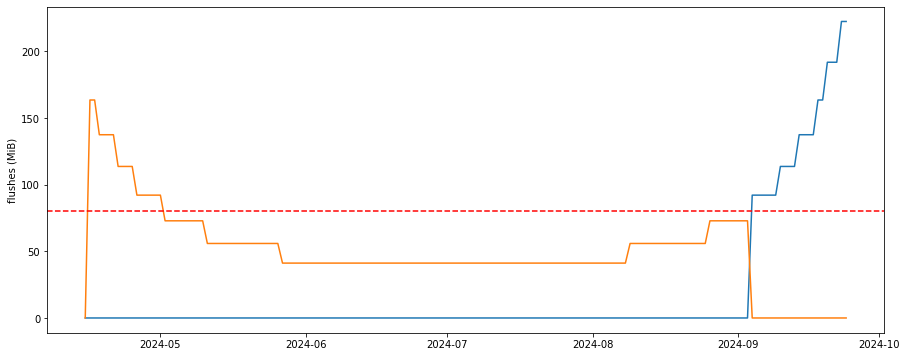

In [76]:
c1 = np.asarray(PHIsyn.part1.history['compr'])
c2 = np.asarray(PHIsyn.part2.history['compr'])
d1 = np.asarray(PHIsyn.part1.history['start'])
d2 = np.asarray(PHIsyn.part2.history['start'])

starttime = min(min(d1),min(d2))
endtime = max(max(d1),max(d2))
t0 = starttime
times = []
while starttime.date() <= endtime.date():
    times.append(starttime.date())
    starttime += TD(days=1)
starttime = t0; del t0
times_float = [(t - d1[0]).total_seconds() for t in d1]
times = np.asarray(times)

newc1 = np.zeros(np.size(times))
for i,j in zip(d1,c1):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc1[ind] += j*1e6/2**20
newc1 = np.asarray(newc1)

newc2 = np.zeros(np.size(times))
for i,j in zip(d2,c2):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc2[ind] += j*1e6/2**20
newc2 = np.asarray(newc2)

plt.figure(figsize=(15,6))
plt.plot(times,newc1)
plt.plot(times,newc2)
plt.axhline(80,color='red',linestyle='--')
plt.ylabel('flushes (MiB)')

In [77]:
# print(times[np.where(newc2*1e3>80)])
# print(np.where(newc2>80))
print((newc2[:17]-80).sum())
print((newc2[17:142]-80).sum())
print((newc2[142:]-80).sum())

524.4102656249999
-3797.406409179688
-1680.0


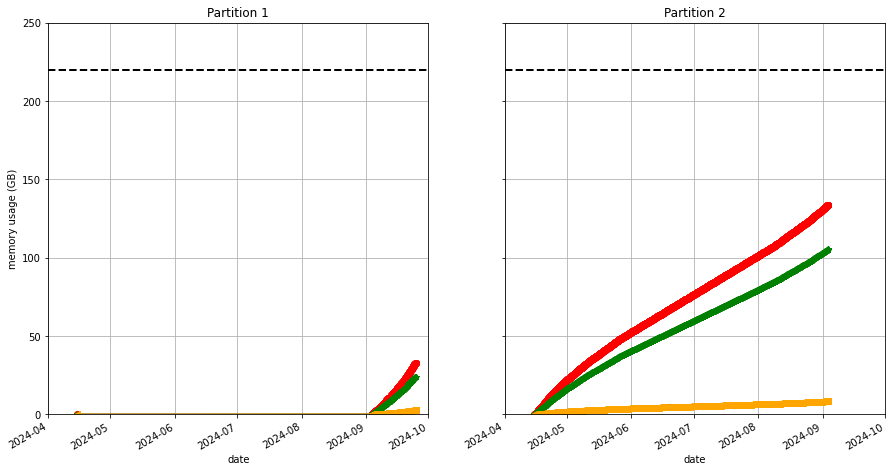

In [78]:
xlim = (DT(2024,4,1,0,0,0),DT(2024,10,1,0,0,0))
plot_tot(PHIsyn, xlim=xlim, ylim=(0,250), time_ord=True)

# <span style="color:yellow">PLOTS</span>

We should try to format partition two at some point, in this way we could add more FDT synoptic during and after RSWs.

Implementing CROP+Pack would save ~70 GB of memory in NAND1

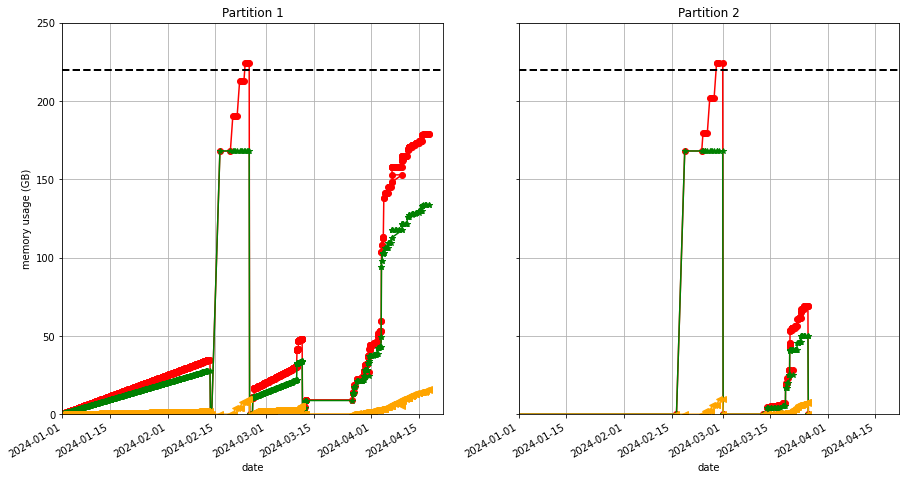

In [57]:
xlim = (DT(2024,1,1,0,0,0),DT(2024,4,22,0,0,0))
plot_tot(PHI, xlim=xlim, ylim=(0,250), time_ord=True)

/tmp/ipykernel_154481/2557985455.py:221: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(times,newc1+newc2,color='black',linestyle='-',marker='.',label='total: '+str(round(total,1))+' GB')


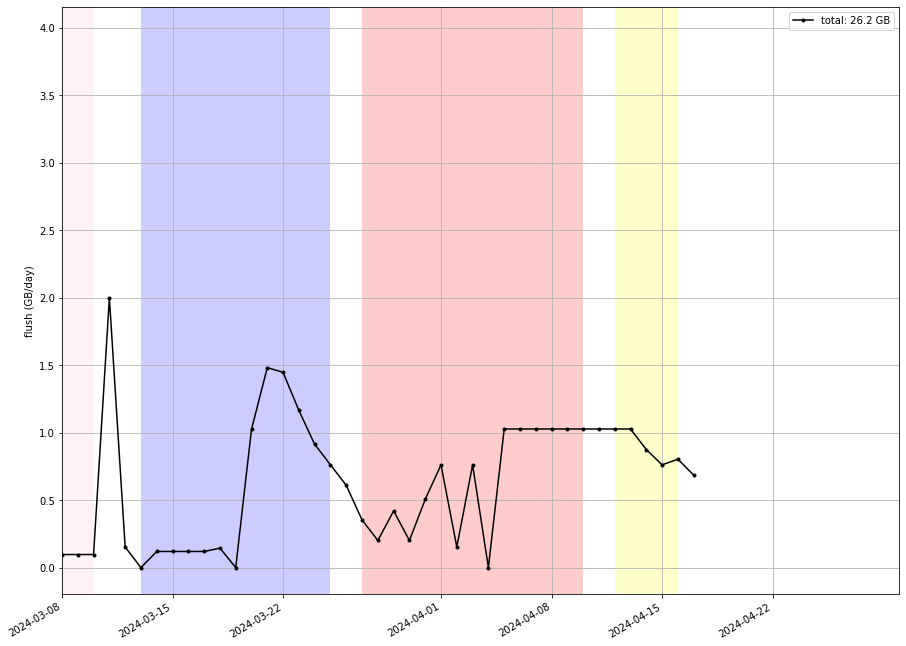

In [79]:
xlim = (DT(2024,3,8,0,0,0),DT(2024,4,30,0,0,0))
tt, tm1, tm2 = plot_flush_per_day(PHI,xlim,values=True)
ylim = plt.gca().get_ylim()
plt.fill_betweenx(ylim,DT(2024,2,11),DT(2024,3,10),facecolor='pink',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,3,13),DT(2024,3,25),facecolor='blue',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,3,27),DT(2024,4,10),facecolor='red',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,4,12),DT(2024,4,16),facecolor='yellow',alpha=.2)
plt.ylim(ylim);
# 1 GB = 2.2h of flushing

In [152]:
rsw10 = [DT(2024,3,12,0,0,0),DT(2024,3,25,0,0,0)]
rsw11 = [DT(2024,3,25,0,0,0),DT(2024,4,12,0,0,0)]
rsw12 = [DT(2024,4,12,0,0,0),DT(2024,4,17,0,0,0)]

rsw10_1 = tm1[np.where(np.logical_and(tt>=rsw10[0].date(),tt<rsw10[1].date()))] * 1e9 / 2**20
rsw10_2 = tm2[np.where(np.logical_and(tt>=rsw10[0].date(),tt<rsw10[1].date()))]* 1e9 / 2**20

rsw11_1 = tm1[np.where(np.logical_and(tt>=rsw11[0].date(),tt<rsw11[1].date()))]* 1e9 / 2**20
rsw11_2 = tm2[np.where(np.logical_and(tt>=rsw11[0].date(),tt<rsw11[1].date()))]* 1e9 / 2**20

rsw12_1 = tm1[np.where(np.logical_and(tt>=rsw12[0].date(),tt<rsw12[1].date()))]* 1e9 / 2**20
rsw12_2 = tm2[np.where(np.logical_and(tt>=rsw12[0].date(),tt<rsw12[1].date()))]* 1e9 / 2**20

out_1 = tm1[np.where(tt>=rsw12[1].date())]* 1e9 / 2**20
out_2 = tm2[np.where(tt>=rsw12[1].date())]* 1e9 / 2**20

print('(MiB)\tNAND-1\tNAND-2\ttotal')
print(f'RSW-10\t{int(round(rsw10_1.sum(),0))}\t{int(round(rsw10_2.sum(),0))}\t{int(round(rsw10_1.sum()+rsw10_2.sum(),0))}')
print(f'RSW-11\t{int(round(rsw11_1.sum(),0))}\t{int(round(rsw11_2.sum(),0))}\t{int(round(rsw11_1.sum()+rsw11_2.sum(),0))}')
print(f'RSW-12\t{int(round(rsw12_1.sum(),0))}\t{int(round(rsw12_2.sum(),0))}\t{int(round(rsw12_1.sum()+rsw12_2.sum(),0))}')
print(f'total\t{int(round(rsw10_1.sum()+rsw11_1.sum()+rsw12_1.sum(),0))}\t{int(round(rsw10_2.sum()+rsw11_2.sum()+rsw12_2.sum(),0))}'+
      f'\t{int(round(rsw10_1.sum()+rsw10_2.sum()+rsw11_1.sum()+rsw11_2.sum()+rsw12_1.sum()+rsw12_2.sum(),0))}')
print('')
print(f'out\t{int(round(out_1.sum(),0))}\t{int(round(out_2.sum(),0))}\t{int(round(out_1.sum()+out_2.sum(),0))}')


(MiB)	NAND-1	NAND-2	total
RSW-10	145	6344	6489
RSW-11	9982	1307	11288
RSW-12	4285	0	4285
total	14411	7651	22062

out	653	0	653


In [47]:
print('DATE\tFLUSH NAND-1 (MiB)\tFLUSH NAND-2 (MiB)')
for tti, tm1i, tm2i in zip(tt,tm1,tm2):
    print(str(tti)+'\t'+'{:.0f}'.format(tm1i*1e9/2**20)+'\t'+'{:.0f}'.format(tm2i*1e9/2**20))

DATE	FLUSH NAND-1 (MiB)	FLUSH NAND-2 (MiB)
2023-12-31	0	0
2024-01-01	41	0
2024-01-02	41	0
2024-01-03	41	0
2024-01-04	41	0
2024-01-05	41	0
2024-01-06	41	0
2024-01-07	41	0
2024-01-08	41	0
2024-01-09	41	0
2024-01-10	41	0
2024-01-11	41	0
2024-01-12	41	0
2024-01-13	41	0
2024-01-14	41	0
2024-01-15	41	0
2024-01-16	41	0
2024-01-17	41	0
2024-01-18	41	0
2024-01-19	41	0
2024-01-20	41	0
2024-01-21	41	0
2024-01-22	41	0
2024-01-23	41	0
2024-01-24	41	0
2024-01-25	41	0
2024-01-26	41	0
2024-01-27	41	0
2024-01-28	41	0
2024-01-29	41	0
2024-01-30	41	0
2024-01-31	41	0
2024-02-01	41	0
2024-02-02	41	0
2024-02-03	41	0
2024-02-04	41	0
2024-02-05	41	0
2024-02-06	41	0
2024-02-07	41	0
2024-02-08	41	0
2024-02-09	41	0
2024-02-10	41	0
2024-02-11	56	0
2024-02-12	56	0
2024-02-13	0	0
2024-02-14	0	0
2024-02-15	0	0
2024-02-16	0	0
2024-02-17	0	0
2024-02-18	0	0
2024-02-19	0	0
2024-02-20	3702	0
2024-02-21	0	0
2024-02-22	3702	0
2024-02-23	0	0
2024-02-24	1851	1851
2024-02-25	0	0
2024-02-26	56	3702
2024-02-27	1871	0
2024-02-28

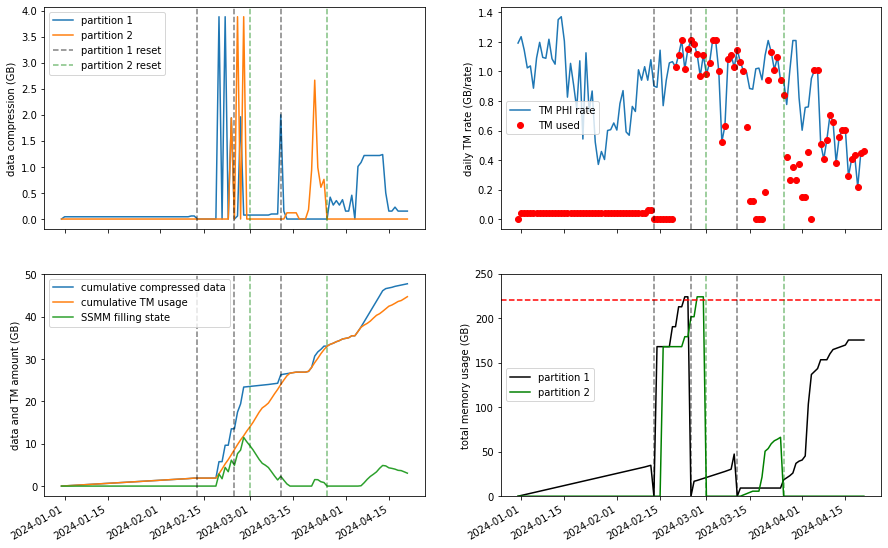

In [93]:
from scipy.interpolate import interp1d
tot1 = np.asarray(PHI.part1.history['occu'])
tot2 = np.asarray(PHI.part2.history['occu'])
c1 = np.asarray(PHI.part1.history['compr'])
c2 = np.asarray(PHI.part2.history['compr'])
d1 = np.asarray(PHI.part1.history['start'])
d2 = np.asarray(PHI.part2.history['start'])

starttime = min(min(d1),min(d2))
endtime = max(max(d1),max(d2))
t0 = starttime
times = []
while starttime.date() <= endtime.date():
    times.append(starttime.date())
    starttime += TD(days=1)
starttime = t0; del t0
times_float = [(t - d1[0]).total_seconds() for t in d1]
times = np.asarray(times)

s = np.argsort(d1)

newtot1 = np.zeros(np.size(times))
for i,j in zip(d1,tot1):
    if True:
        ind = np.where(times == i.date())[0]
        newtot1[ind] += j/1e3
newtot1 = np.asarray(newtot1)

newtot2 = np.zeros(np.size(times))
for i,j in zip(d2,tot2):
    if True:
        ind = np.where(times == i.date())[0]
        newtot2[ind] += j/1e3
newtot2 = np.asarray(newtot2)

newc1 = np.zeros(np.size(times))
for i,j in zip(d1,c1):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc1[ind] += j/1e3
newc1 = np.asarray(newc1)


newc2 = np.zeros(np.size(times))
for i,j in zip(d2,c2):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc2[ind] += j/1e3
newc2 = np.asarray(newc2)

form1 = np.zeros(np.size(times))
for i,j in zip(d1,c1):
    if j<0:
        ind = np.where(times == i.date())[0]
        form1[ind] += j/1e3
form1 = np.asarray(form1)


form2 = np.zeros(np.size(times))
for i,j in zip(d2,c2):
    if j<0:
        ind = np.where(times == i.date())[0]
        form2[ind] += j/1e3
form2 = np.asarray(form2)

trig1 = np.where(form1 < 0)[0]
trig2 = np.where(form2 < 0)[0]

x = TM3['date'][np.logical_and(TM3['date'] <= endtime+TD(days=1),TM3['date'] >= starttime-TD(days=1))]
y = TM3['tm_rate'][np.logical_and(TM3['date'] <= endtime+TD(days=1),TM3['date'] >= starttime-TD(days=1))]
z = TM3['duration'][np.logical_and(TM3['date'] <= endtime+TD(days=1),TM3['date'] >= starttime-TD(days=1))]

xx = [(i - starttime).total_seconds() for i in x]
f = interp1d(xx, y*z,fill_value='extrapolate')
xnew = [(i - starttime.date()).total_seconds() for i in times]
ynew = f(xnew)/8e9
ynew[times<datetime.date(2023,4,1)] *= .2
ynew[times>=datetime.date(2023,4,1)] *= .3

tm_used = np.zeros(times.size)
down = 0#np.zeros(times.size)
for i in range(times.size):
    if newc1[i] > 0 or newc2[i] > 0:
        tm_used[i] = min(ynew[i],np.sum(newc1[:i+1] + newc2[:i+1]) - tm_used[:i].sum())
        down = max(0,np.sum(newc1[:i+1] + newc2[:i+1] - tm_used[:i+1]))
    else:
        if down > 0:
            tm_used[i] = min(ynew[i],np.sum(newc1[:i+1] + newc2[:i+1]) - tm_used[:i].sum())
            down = max(0,np.sum(newc1[:i+1] + newc2[:i+1] - tm_used[:i+1]))

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.ylabel('data compression (GB)')
plt.plot(times,newc1,label='partition 1')
plt.plot(times,newc2,label='partition 2')
for i,t in enumerate(trig1):
    if i == 0:
        plt.axvline(times[t],linestyle='--',color='k',alpha=.5,label='partition 1 reset')
    else:
        plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for i,t in enumerate(trig2):
    if i == 0:
        plt.axvline(times[t],linestyle='--',color='g',alpha=.5,label='partition 2 reset')
    else:
        plt.axvline(times[t],linestyle='--',color='g',alpha=.5)
plt.legend()

plt.subplot(222)
plt.ylabel('daily TM rate (GB/rate)')
plt.plot(times,ynew,label='TM PHI rate')
plt.plot(times,tm_used,'ro',label='TM used')
plt.legend()
for t in trig1:
    plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for t in trig2:
    plt.axvline(times[t],linestyle='--',color='g',alpha=.5)
# print('total1408 TM used:',round(tm_used.sum(),2),'GB')
# print('total compressed data:',round((newc1+newc2).sum(),2),'GB')
# plt.xlim(datetime.date(2023,1,10),datetime.date(2023,2,5))
plt.subplot(223)
# cond = np.logical_and(times>=FL['date'][0].date(), times<=FL['date'][-1].date())
cond = np.ones(np.size(times),dtype=bool)
plt.ylabel('data and TM amount (GB)')
plt.plot(times[cond],np.cumsum(newc1[cond]+newc2[cond]),label='cumulative compressed data')
plt.plot(times[cond],np.cumsum(tm_used[cond]),label='cumulative TM usage')
plt.plot(times[cond],np.cumsum(newc1[cond]+newc2[cond])-np.cumsum(tm_used[cond]),label='SSMM filling state')
# plt.plot(FL['date'],-np.cumsum(FL['flush']*2**20/1e9),'m',label='SOOPK FLUSH')
# cond = np.logical_and(FL['date']>DT(2023,1,19,0,0), FL['date']<DT(2023,5,1,0,0))
# plt.plot(FL['date'][cond],-np.cumsum(FL['flush'][cond]*2**20/1e9),'m',label='SOOPK FLUSH')
plt.legend()
for t in trig1:
    plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for t in trig2:
    plt.axvline(times[t],linestyle='--',color='g',alpha=.5)

plt.subplot(224)
plt.ylabel('total memory usage (GB)')
plt.plot(times,np.cumsum(newtot1),'k',label='partition 1')
plt.plot(times,np.cumsum(newtot2),'g',label='partition 2')
plt.legend()
plt.ylim(0,250)
plt.axhline(220,linestyle='--',color='r')
for t in trig1:
    plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for t in trig2:
    plt.axvline(times[t],linestyle='--',color='g',alpha=.5)

plt.gcf().autofmt_xdate()
# plt.savefig('/home/calchetti/MPStemp/pics/TM/tm_v5.1.png')

In [132]:
print('Total amount of TM used:',round(tm_used.sum(),2),'GB')
print('Total amount of compressed data:',round((newc1+newc2).sum(),2),'GB')

Total amount of TM used: 50.56 GB
Total amount of compressed data: 50.56 GB


(19816.0, 19823.0)

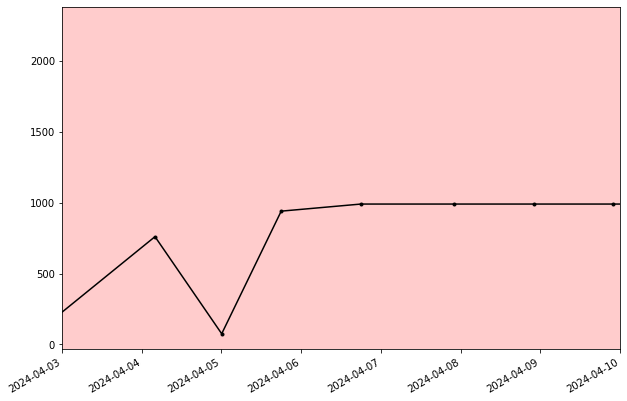

In [11]:
xlim = (DT(2024,4,3,0,0,0),DT(2024,4,10,0,0,0))
plt.figure(figsize=(10,7))
plt.plot(FL['date'],-FL['flush'],'k.-')
ylim = plt.gca().get_ylim()
plt.gcf().autofmt_xdate()
plt.fill_betweenx(ylim,DT(2024,2,11),DT(2024,3,10),facecolor='pink',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,3,13),DT(2024,3,25),facecolor='blue',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,3,27),DT(2024,4,10),facecolor='red',alpha=.2)
plt.fill_betweenx(ylim,DT(2024,4,12),DT(2024,4,16),facecolor='yellow',alpha=.2)
plt.ylim(ylim)
plt.xlim(xlim)